In [2]:
import pandas as pd
import numpy as np

asbestos = pd.read_csv("Asbestos.csv")

In [3]:
query_mask = asbestos['city'] == 'PITTSBURGH'
asbestos_in_pitt = asbestos[query_mask]

<AxesSubplot:>

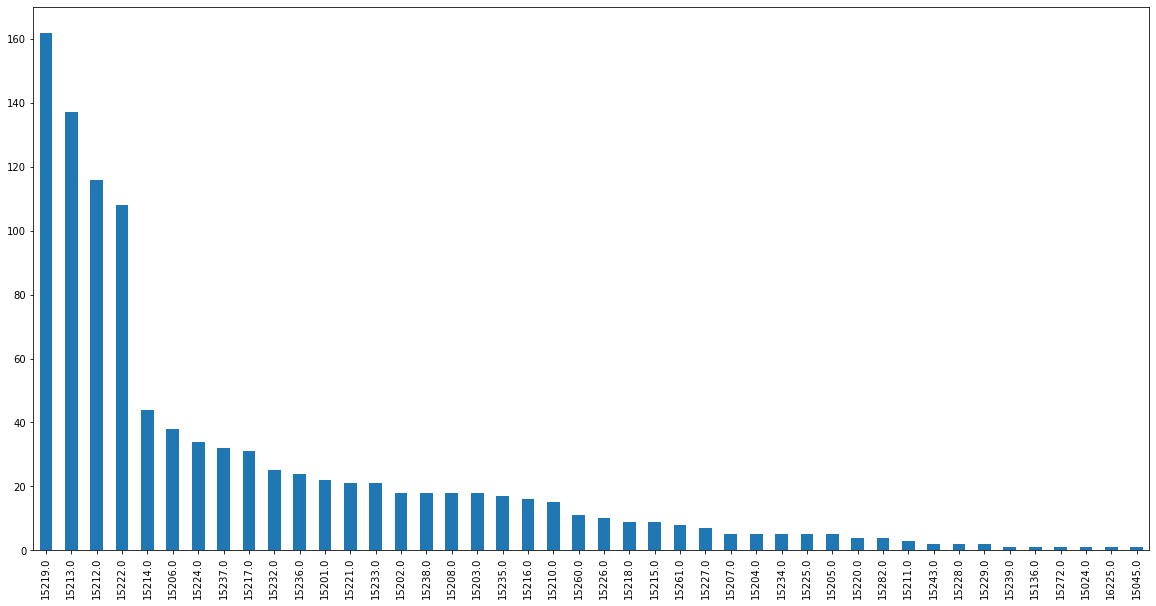

In [4]:
zip_and_asbestos = pd.DataFrame({'zip_code':asbestos_in_pitt['z_code'],'asbestos_free':asbestos_in_pitt['job_complete']})
query_mask2 = zip_and_asbestos['asbestos_free'] == 'f'
contains_asbestos = zip_and_asbestos[query_mask2]
contains_asbestos['zip_code'].value_counts().plot.bar(figsize=(20,10))

In [5]:
contains_asbestos['zip_code'].value_counts()

15219.0    162
15213.0    137
15212.0    116
15222.0    108
15214.0     44
15206.0     38
15224.0     34
15237.0     32
15217.0     31
15232.0     25
15236.0     24
15201.0     22
15221.0     21
15233.0     21
15202.0     18
15238.0     18
15208.0     18
15203.0     18
15235.0     17
15216.0     16
15210.0     15
15260.0     11
15226.0     10
15218.0      9
15215.0      9
15261.0      8
15227.0      7
15207.0      5
15204.0      5
15234.0      5
15225.0      5
15205.0      5
15220.0      4
15282.0      4
15211.0      3
15243.0      2
15228.0      2
15229.0      2
15239.0      1
15136.0      1
15272.0      1
15024.0      1
16225.0      1
15045.0      1
Name: zip_code, dtype: int64

In [10]:
with_neighborhood = pd.read_csv("Asbestos_WithNeighborhood.csv")
query_mask3 = with_neighborhood["job_complete"] == "f"
neighborhood_contains_asbestos = with_neighborhood[query_mask3]

<AxesSubplot:>

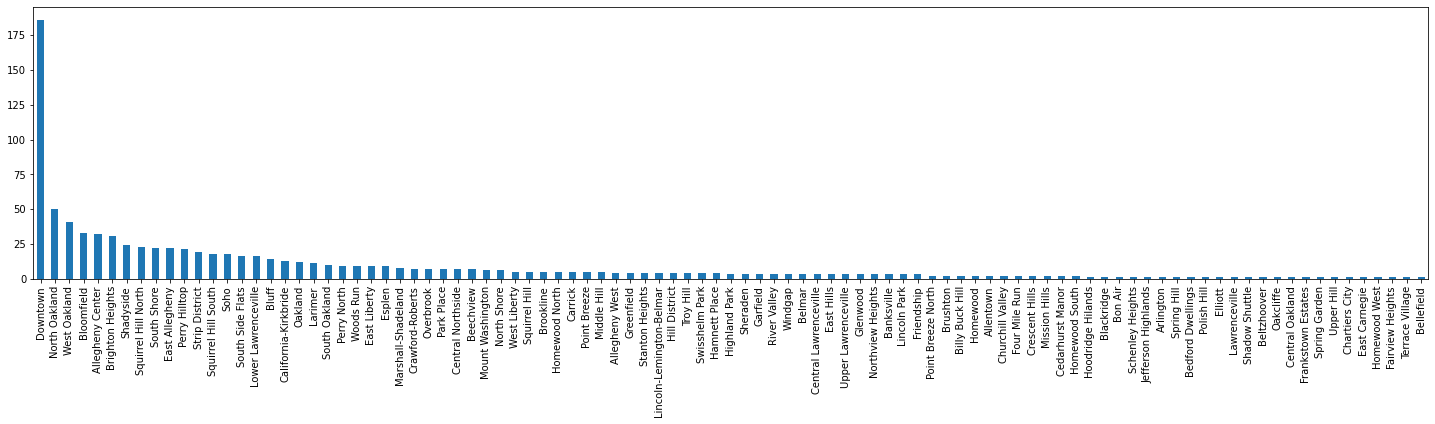

In [21]:
neighborhood_contains_asbestos["neighborhood"].value_counts().plot.bar(figsize = (25,5))

In [35]:
pd.options.display.max_rows = 100
neighborhood_contains_asbestos["neighborhood"].value_counts()

Downtown                    186
North Oakland                50
West Oakland                 41
Bloomfield                   33
Allegheny Center             32
Brighton Heights             31
Shadyside                    24
Squirrel Hill North          23
South Shore                  22
East Allegheny               22
Perry Hilltop                21
Strip District               19
Squirrel Hill South          18
Soho                         18
South Side Flats             16
Lower Lawrenceville          16
Bluff                        14
California-Kirkbride         13
Oakland                      12
Larimer                      11
South Oakland                10
Perry North                   9
Woods Run                     9
East Liberty                  9
Esplen                        9
Marshall-Shadeland            8
Crawford-Roberts              7
Overbrook                     7
Park Place                    7
Central Northside             7
Beechview                     7
Mount Wa